# Data preprocessing and Model building

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [3]:
import pickle

In [4]:
# Load dataset
data = pd.read_csv(r"D:\Unified mentor\bank+marketing\bank\bank-full.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Drop unnecessary columns
data.drop(columns=['duration'], inplace=True)

In [6]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,1,-1,0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,1,-1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,1,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [7]:
# Target encoding
data['y'] = data['y_yes'].map({True: 1, False: 0})


In [8]:
# Dropping the 'y_yes' column after encoding
data.drop(columns=['y_yes'], inplace=True)
data.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,1,-1,0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,0
1,44,29,5,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0
2,33,2,5,1,-1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,0
3,47,1506,5,1,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,0
4,33,1,5,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0


In [9]:
# Standardize numerical columns
scaler = StandardScaler()
data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])


In [10]:
X = data.drop(columns = ['y'])
y = data['y']

In [11]:
# split data into features(X)and target(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

In [12]:
# Initialize Models
models ={
    'Decision Tree':DecisionTreeClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Naiv Bayes':GaussianNB(),
    'K-Nearest Neighbors':KNeighborsClassifier()
}

In [13]:
# Train models and evaluate
model_performance = {}

for model_name,model in models.items():
    #train model
    model.fit(X_train,y_train)
    #Predict on test set
    y_pred = model.predict(X_test)
    
    #Evaluate the model
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    #Store performance
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Kappa': kappa,
        'AUC': auc
    }
    
    # Print classification report and confusion matrix
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)
    
   
    

Model: Decision Tree
Confusion Matrix:
[[7203  802]
 [ 700  338]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      8005
           1       0.30      0.33      0.31      1038

    accuracy                           0.83      9043
   macro avg       0.60      0.61      0.61      9043
weighted avg       0.84      0.83      0.84      9043

Model: Logistic Regression
Confusion Matrix:
[[7900  105]
 [ 845  193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8005
           1       0.65      0.19      0.29      1038

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

Model: Random Forest
Confusion Matrix:
[[7850  155]
 [ 799  239]]
Classification Report:
              precision    recall  f1-score   support

           0      

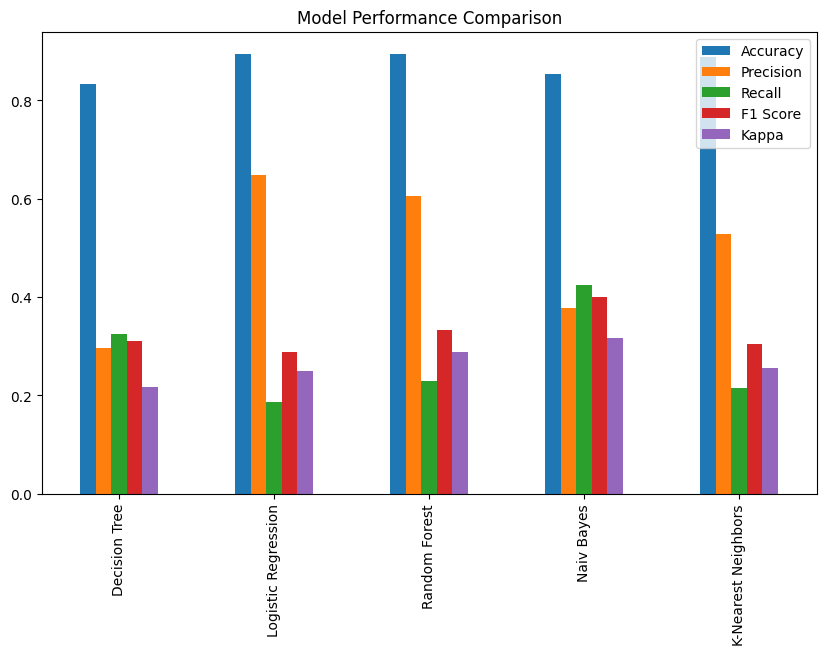

In [14]:
 # Plot comparison of model performance
performance_df = pd.DataFrame(model_performance).T
performance_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.show()


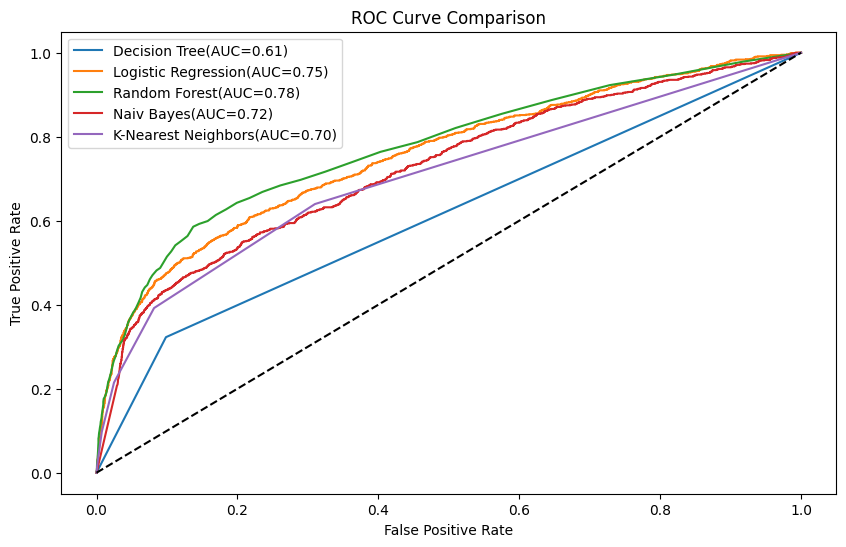

In [15]:
plt.figure(figsize=(10,6))
for model_name,model in models.items():
    model.fit(X_train ,y_train)
    
    y_proba = model.predict_proba(X_test)[:,1]
    fpr,tpr, _= roc_curve(y_test,y_proba)
    plt.plot(fpr,tpr,label = f'{model_name}(AUC={model_performance[model_name]["AUC"]:.2f})')

# Additional settings for the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

In [16]:
best_model = models['Random Forest']
with open('best_model.pkl','wb') as file:
    pickle.dump(best_model,file)

In [17]:
# Import necessary libraries
from flask import Flask, request, jsonify

In [ ]:


# Load the trained model 
model = pickle.load(open('best_model.pkl', 'rb'))

app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Prediction API!"

# Define the prediction route
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from the request
        data = request.get_json(force=True)
        
        # Prepare input data (this is an example, make sure the keys match your JSON input)
        """input_data = np.array([data['age'], 
                               data['job'], 
                               data['marital'], 
                               data['education'], 
                               data['default'], 
                               data['balance'], 
                               data['housing'], 
                               data['loan'], 
                               data['contact'], 
                               data['day'], 
                               data['month'], 
                               data['campaign'], 
                               data['pdays'], 
                               data['previous'], 
                               data['poutcome']]).reshape(1, -1)"""
        # Convert input data to DataFrame
        input_data = pd.DataFrame([data])
        
        # Apply one-hot encoding similar to the training data
        input_data = pd.get_dummies(input_data, drop_first=True)
        
        # Ensure the same dummy columns
        missing_cols = set(X.columns) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0 
            
        input_data = input_data[X.columns] # Reorder to match the training columns
        
        # Standardize numerical columns
        input_data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = scaler.transform(input_data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
        
        # Preprocess the input data (apply any scaling or encoding used during training)
        # For example:
        # input_data = scaler.transform(input_data)  # if you used StandardScaler

        # Make prediction
        prediction = model.predict(input_data)
        
        # Return prediction as JSON
        return jsonify({'prediction': int(prediction[0])})
    
    except Exception as e:
        return jsonify({'error': str(e)}), 400

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Oct/2024 21:54:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2024 21:55:26] "POST /predict HTTP/1.1" 400 -
127.0.0.1 - - [19/Oct/2024 09:09:46] "POST /predict HTTP/1.1" 200 -


In [ ]:
# run this code in cmd
# curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d "{\"age\": 30, \"job\": \"management\", \"marital\": \"married\", \"education\": \"tertiary\", \"default\": \"no\", \"balance\": 1500, \"housing\": \"yes\", \"loan\": \"no\", \"contact\": \"cellular\", \"day\": 15, \"month\": \"may\", \"campaign\": 1, \"pdays\": -1, \"previous\": 0, \"poutcome\": \"unknown\"}"
